In [61]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [2]:
churn = pd.read_csv('churn_data.csv')
churn.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
custom = pd.read_csv('customer_data.csv')
custom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [4]:
internet = pd.read_csv('internet_data.csv')
internet.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [5]:
original_df = churn.merge(custom, how='left', on='customerID').merge(internet, how='left', on='customerID')

In [45]:
# объединяем в один датафрейм
pd.set_option('display.max_columns', 25)
df = churn.merge(custom, how='left', on='customerID').merge(internet, how='left', on='customerID')
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
dtypes: float64(1), int64(2), obj

In [8]:
# выводим статистическую информацию по строковым типам, чтобы понять вариативность переменных
df.describe(include=[ 'object'])

,customerID,PhoneService,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn,gender,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,3,2,4,6531,2,2,2,2,3,3,3,3,3,3,3,3
top,0428-AXXLJ,Yes,Month-to-month,Yes,Electronic check,,No,Male,No,No,No,Fiber optic,No,No,No,No,No,No
freq,1,6361,3875,4171,2365,11,5174,3555,3641,4933,3390,3096,3498,3088,3095,3473,2810,2785


In [9]:
# столбец TotalCharges необходимо привести к типу float
# приведение с помощью astype(float) дало ошибку, сортируем данные в поисках причин для ошибки
df.sort_values('TotalCharges').head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
936,5709-LVOEQ,0,Yes,Two year,No,Mailed check,80.85,,No,Female,0,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes
3826,3213-VVOLG,0,Yes,Two year,No,Mailed check,25.35,,No,Male,0,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
4380,2520-SGTTA,0,Yes,Two year,No,Mailed check,20.00,,No,Female,0,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
753,3115-CZMZD,0,Yes,Two year,No,Mailed check,20.25,,No,Male,0,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
5218,2923-ARZLG,0,Yes,One year,Yes,Mailed check,19.70,,No,Male,0,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service


In [47]:
# встречаются строки с пробелом, заменяем пробел на значение 'NaN', после чего преобразуем формат
df['TotalCharges'] = df['TotalCharges'].str.replace(' ', 'NaN').astype(float)
# проверяем количество сделанных замен
df['TotalCharges'].isnull().sum()

11

In [48]:
# т.к. 'NaN'-значений мало, заменяем их средним значением переменной
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.50,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [12]:
list(df.columns)

['customerID',
 'tenure',
 'PhoneService',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [49]:
# приводим категориальные переменные со значениями 'Yes/No' к количественному типу, заменяя на 1 и 0 соответственно
def categorial_convert_numeric(df, list_columns):
    dict_yes_no = {'Yes': 1, 'No': 0, 'Female': 0, 'Male': 1}
    for column in list_columns:
        df[column] = df[column].map(dict_yes_no)
    return df

list_columns_for_convert = ['PhoneService',
 'PaperlessBilling',
 'Churn',
 'Partner',
 'Dependents',
 'gender']

categorial_convert_numeric(df, list_columns_for_convert)
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,0,0,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.50,0,1,0,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,0,0,0,0,No,Fiber optic,No,No,No,No,No,No


In [50]:
# категориальные переменные, принимающие больше 2 значений, приводим к количественному типу с помощью "каунтов",
# не используем "One hot encoding", чтобы не увеличивать в разы количество столбцов, т.к. таких переменных много
def use_counts(list_columns_counts, df = df, target_column = 'Churn'):
    dict_category = {}
    for column in list_columns_counts:
        dict_category[column] = (df[df[target_column] == 1][column].value_counts() / df[column].value_counts()).to_dict()
    for column in list_columns_counts:
        df[column] = df[column].apply(dict_category[column].get)
    print(dict_category)
    return df

list_columns_counts = ['Contract',
 'PaymentMethod',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

use_counts(list_columns_counts)
df.head()

{'Contract': {'Month-to-month': 0.4270967741935484, 'One year': 0.11269517990495587, 'Two year': 0.02831858407079646}, 'PaymentMethod': {'Electronic check': 0.4528541226215645, 'Mailed check': 0.19106699751861042, 'Bank transfer (automatic)': 0.16709844559585493, 'Credit card (automatic)': 0.15243101182654403}, 'MultipleLines': {'No': 0.2504424778761062, 'No phone service': 0.24926686217008798, 'Yes': 0.286098956580276}, 'InternetService': {'Fiber optic': 0.4189276485788114, 'DSL': 0.1895910780669145, 'No': 0.07404980340760157}, 'OnlineSecurity': {'No': 0.4176672384219554, 'Yes': 0.14611193660227836, 'No internet service': 0.07404980340760157}, 'OnlineBackup': {'No': 0.39928756476683935, 'Yes': 0.21531494442157267, 'No internet service': 0.07404980340760157}, 'DeviceProtection': {'No': 0.3912762520193861, 'Yes': 0.2250206440957886, 'No internet service': 0.07404980340760157}, 'TechSupport': {'No': 0.4163547365390153, 'Yes': 0.15166340508806261, 'No internet service': 0.0740498034076015

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,0.427097,1,0.452854,29.85,29.85,0,0,0,1,0,0.249267,0.189591,0.417667,0.215315,0.391276,0.416355,0.335231,0.336804
1,5575-GNVDE,34,1,0.112695,0,0.191067,56.95,1889.50,0,1,0,0,0,0.250442,0.189591,0.146112,0.399288,0.225021,0.416355,0.335231,0.336804
2,3668-QPYBK,2,1,0.427097,1,0.191067,53.85,108.15,1,1,0,0,0,0.250442,0.189591,0.146112,0.215315,0.391276,0.416355,0.335231,0.336804
3,7795-CFOCW,45,0,0.112695,0,0.167098,42.30,1840.75,0,1,0,0,0,0.249267,0.189591,0.146112,0.399288,0.225021,0.151663,0.335231,0.336804
4,9237-HQITU,2,1,0.427097,1,0.452854,70.70,151.65,1,0,0,0,0,0.250442,0.418928,0.417667,0.399288,0.391276,0.416355,0.335231,0.336804


In [51]:
# смотрим статистики
df.describe()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,0.903166,0.265370,0.592219,0.265370,64.761692,2283.300441,0.265370,0.504756,0.162147,0.483033,0.299588,0.265370,0.265370,0.265370,0.265370,0.265370,0.265370,0.265370,0.265370
std,24.559481,0.295752,0.181091,0.491457,0.133951,30.090047,2265.000258,0.441561,0.500013,0.368612,0.499748,0.458110,0.017711,0.142383,0.153399,0.129075,0.124335,0.151419,0.101781,0.101979
min,0.000000,0.000000,0.028319,0.000000,0.152431,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.249267,0.074050,0.074050,0.074050,0.074050,0.074050,0.074050,0.074050
25%,9.000000,1.000000,0.112695,0.000000,0.167098,35.500000,402.225000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250442,0.189591,0.146112,0.215315,0.225021,0.151663,0.300702,0.299414
50%,29.000000,1.000000,0.427097,1.000000,0.191067,70.350000,1400.550000,0.000000,1.000000,0.000000,0.000000,0.000000,0.250442,0.189591,0.146112,0.215315,0.225021,0.151663,0.300702,0.299414
75%,55.000000,1.000000,0.427097,1.000000,0.452854,89.850000,3786.600000,1.000000,1.000000,0.000000,1.000000,1.000000,0.286099,0.418928,0.417667,0.399288,0.391276,0.416355,0.335231,0.336804
max,72.000000,1.000000,0.427097,1.000000,0.452854,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,0.286099,0.418928,0.417667,0.399288,0.391276,0.416355,0.335231,0.336804


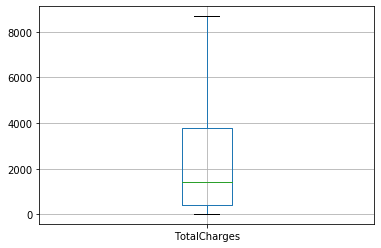

In [16]:
df.boxplot('TotalCharges')

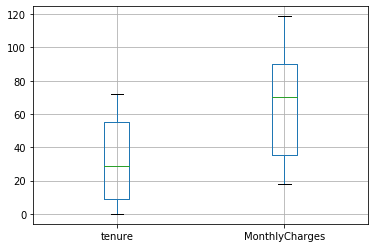

In [17]:
df.boxplot(['tenure',
 'MonthlyCharges'])

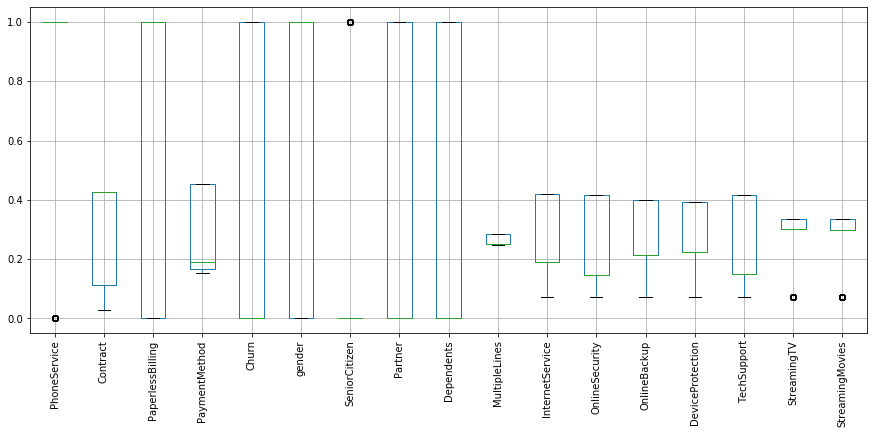

In [18]:
df.boxplot(['PhoneService',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies'], figsize=(15,6), rot=90)

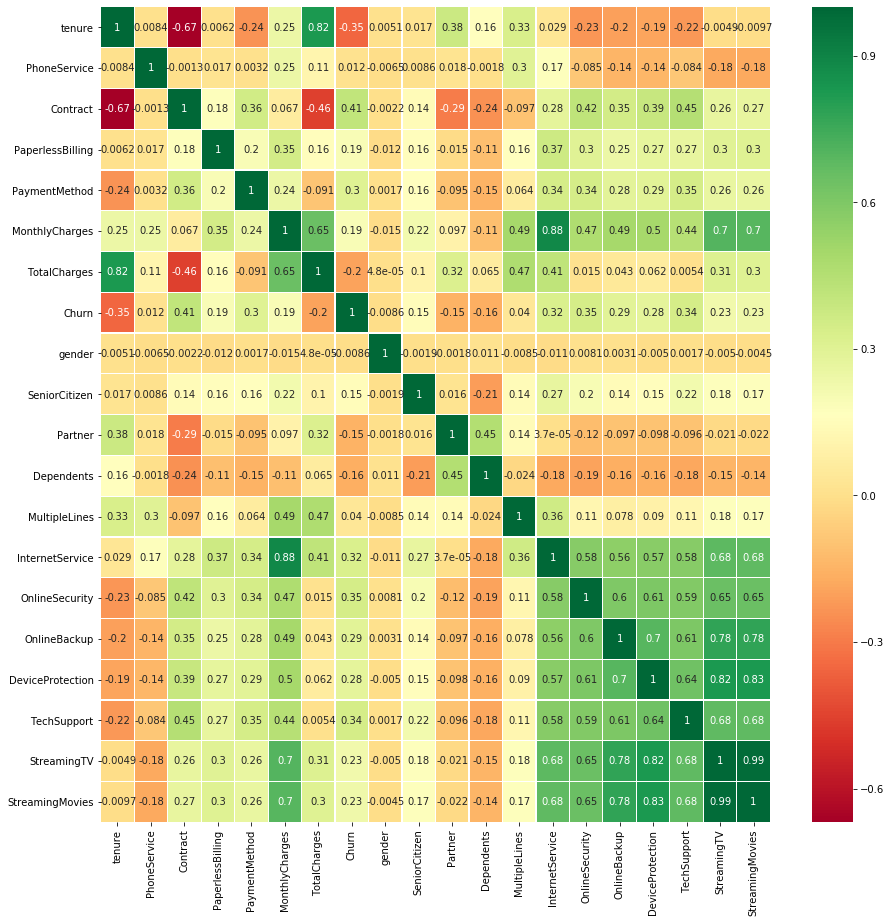

In [19]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(15,15)
plt.show()

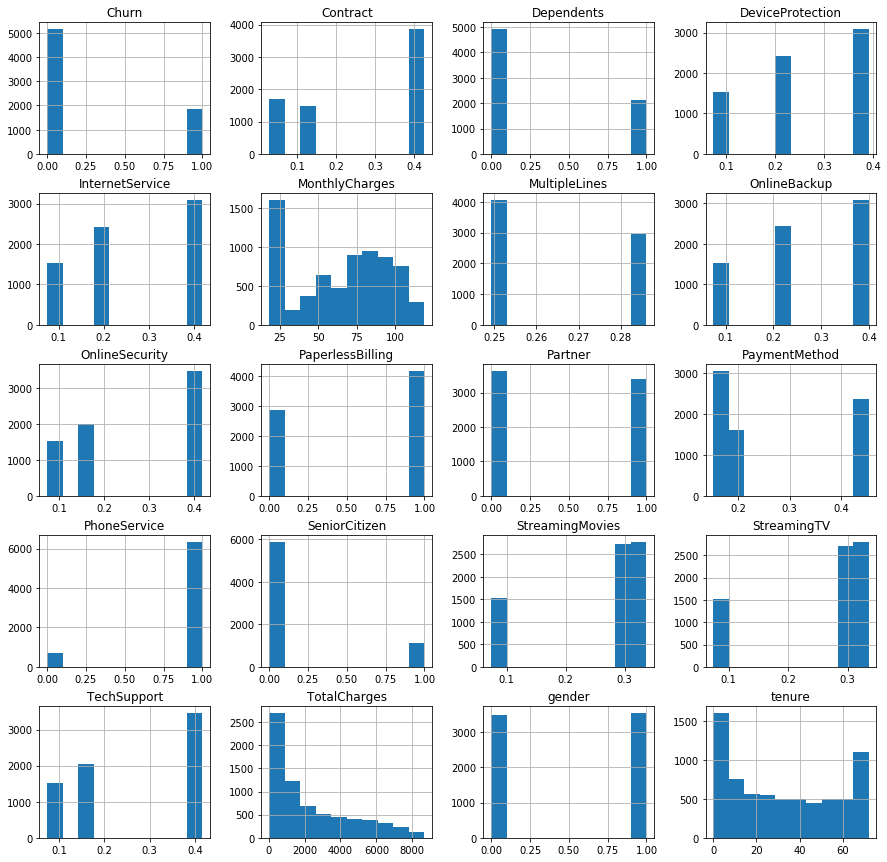

In [20]:
df.hist(figsize=(15,15))
plt.show()

In [21]:
# рассчитаем процент ушедших клиентов
print('Сколько клиентов ушло:', len(df[df['Churn'] == 1]))
print('Сколько клиентов осталось:', len(df[df['Churn'] == 0]))
print('Процент ушедших:', round(((len(df[df['Churn'] == 1])*100)/len(df)), 2))

Сколько клиентов ушло: 1869
Сколько клиентов осталось: 5174
Процент ушедших: 26.54


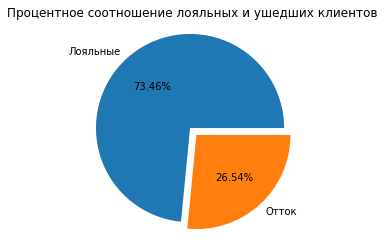

In [80]:
vals = [5174, 1869]
labels = ['Лояльные', 'Отток']
explode = (0.1, 0)
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.2f%%', explode=explode)
ax.axis("equal")
plt.title('Процентное соотношение лояльных и ушедших клиентов')
plt.savefig('Процентное соотношение лояльных и ушедших клиентов.png', format='png', dpi=100)
plt.show()

In [23]:
# рассчитаем коэффициент корреляции Спирмена
from scipy.stats import spearmanr
for param in ['tenure', 'Contract', 'InternetService', 'OnlineSecurity', 'TechSupport']:
    stat, p = spearmanr(df['Churn'], df[param])
    print(param, ':', 'stat=%.3f' % (stat))

tenure : stat=-0.367
Contract : stat=0.406
InternetService : stat=0.321
OnlineSecurity : stat=0.342
TechSupport : stat=0.338


In [24]:
# рассмотрим зависимость оттока от времени пользования интернет-сервисом

In [25]:
def tenure_group(tenure):
    """группирует время пользования сервисом по годам"""
    if tenure <= 12:
        return '1До года'
    elif tenure <= 24:
        return '2До двух лет'
    elif tenure <= 36:
        return '3До трех лет'
    elif tenure <= 48:
        return '4До четырех лет'
    elif tenure <= 60:
        return '5До пяти лет'
    elif tenure <= 72:
        return '6До шести лет'

In [26]:
original_df['tenure_group'] = original_df['tenure'].apply(tenure_group)

In [27]:
table_tenure = pd.crosstab(original_df['tenure_group'], original_df['Churn'])
table_tenure

Churn,No,Yes
tenure_group,,
1До года,1149,1037
2До двух лет,730,294
3До трех лет,652,180
4До четырех лет,617,145
5До пяти лет,712,120
6До шести лет,1314,93


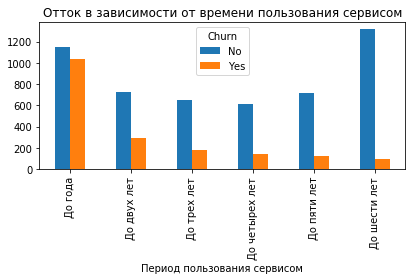

In [28]:
table_tenure.plot(kind='bar')
plt.xticks(range(6), ['До года', 'До двух лет', 'До трех лет', 'До четырех лет', 'До пяти лет', 'До шести лет'])
plt.xlabel('Период пользования сервисом')
plt.title('Отток в зависимости от времени пользования сервисом')
plt.tight_layout()
plt.savefig('Распределение оттока в зависимости от времени пользования сервисом.png', format='png', dpi=100)
plt.show()

In [29]:
# выдвигаем гипотезу о том, что отток одинаков для всех временных групп
# проверяем гипотезу с помощью критерия Хи-квадрат Пирсона
from scipy import stats
chi2, prob, df, expected = stats.chi2_contingency(table_tenure)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
print(output.format(chi2, df, prob))

test Statistics: 873.8577602525022
degrees of freedom: 5
p-value: 1.209674165469595e-186



In [30]:
# получили p-value близкое к нулю, следовательно, зависимость частоты случаев оттока от времени пользования интренет-сервисом статистически значима
# что также подтверждено и графически

In [31]:
# определим зависимость оттока от типа контракта
table_contract = pd.crosstab(original_df['Contract'], original_df['Churn'])
table_contract

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


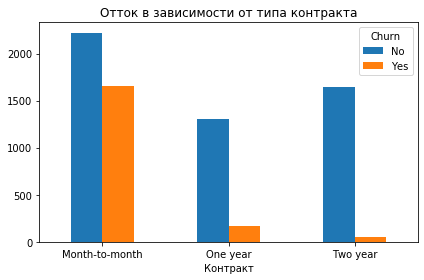

In [32]:
table_contract.plot(kind='bar', rot=0)
plt.title('Отток в зависимости от типа контракта')
plt.xlabel('Контракт')
plt.tight_layout()
plt.savefig('Распределение оттока в зависимости от контракта.png', format='png', dpi=100)
plt.show()

In [33]:
# визуализируем отток в зависимости от подключенного типа интернет услуг, наличия/отсутствия подключенной онлайн безопасности и от пола

In [34]:
table_internet_service = pd.crosstab(original_df['InternetService'], original_df['Churn'])
table_internet_service

Churn,No,Yes
InternetService,,
DSL,1962,459
Fiber optic,1799,1297
No,1413,113


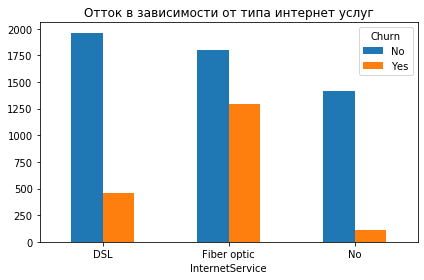

In [35]:
table_internet_service.plot(kind='bar', rot=0)
plt.title('Отток в зависимости от типа интернет услуг')
plt.tight_layout()
plt.savefig('Распределение оттока в зависимости от типа интернет услуг.png', format='png', dpi=100)
plt.show()

In [36]:
# проверим, является ли эта зависимость статистически значимой с помощью критерия Хи-квадрат Пирсона
chi2, prob, df, expected = stats.chi2_contingency(table_internet_service)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
print(output.format(chi2, df, prob))

test Statistics: 732.309589667794
degrees of freedom: 2
p-value: 9.571788222840544e-160



In [37]:
# действительно p-value стремится к нулю, зависимость частоты от тока от выбранного типа интернет-услуги стастически значима

In [38]:
table_gender = pd.crosstab(original_df['gender'], original_df['Churn'])
table_OnlineSecurity = pd.crosstab(original_df['OnlineSecurity'], original_df['Churn'])

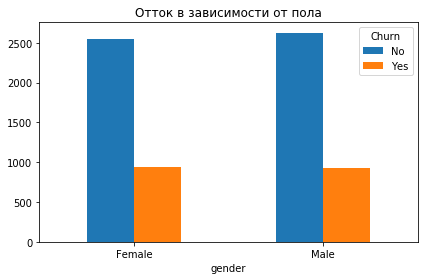

In [39]:
table_gender.plot(kind='bar', rot=0)
plt.title('Отток в зависимости от пола')
plt.tight_layout()
plt.savefig('Отток в зависимости от пола.png', format='png', dpi=100)
plt.show()

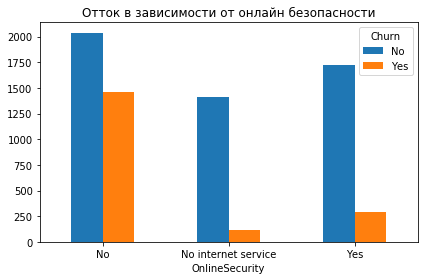

In [40]:
table_OnlineSecurity.plot(kind='bar', rot=0)
plt.title('Отток в зависимости от онлайн безопасности')
plt.tight_layout()
plt.savefig('Отток в зависимости от онлайн безопасности.png', format='png', dpi=100)
plt.show()

In [52]:
# проверим, есть ли статистически значимые различия в суммах ежемесячных платежей и уплаченных суммах у лояльных и ушедших клиентов
# сделаем проверку на нормальность распределения для переменных  'MonthlyCharges' и 'TotalCharges'
from scipy.stats import normaltest
stat, p = normaltest(df['MonthlyCharges'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=11419.529, p=0.000
Probably not Gaussian


In [53]:
from scipy.stats import normaltest
stat, p = normaltest(df['TotalCharges'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=807.332, p=0.000
Probably not Gaussian


In [52]:
# т.к. распределение не является нормальным, для проверки статистических гипотез применим непараметрический тест Манна-Уитни
# выдвигаем гипотезу о том, что ежемесячные платежи у лояльных и ушедших клиентов не отличаются
churn_monthly = df[df['Churn'] == 1]['MonthlyCharges']
nochurn_monthly = df[df['Churn'] == 0]['MonthlyCharges']
u, p_value = stats.mannwhitneyu(churn_monthly, nochurn_monthly)
print('p-value =', p_value)

p-value = 1.6558138259942924e-54


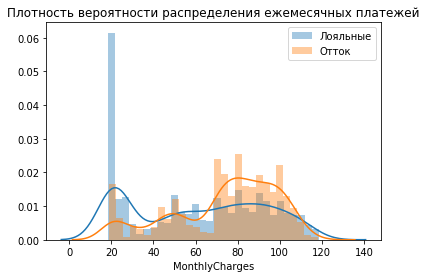

In [51]:
# отобразим графически
sns.distplot(nochurn_monthly, 30)
sns.distplot(churn_monthly, 30)
plt.title('Плотность вероятности распределения ежемесячных платежей')
plt.legend(['Лояльные', 'Отток'])
plt.savefig('Плотность вероятности распределения ежемесячных платежей.png', format='png', dpi=100)
plt.show()

In [41]:
# получив p_value близкое к нулю, отвергаем нулевую гипотезу, считаем различия в ежемесячных платежах лояльных и ушедших клиентов статистически значимыми

In [53]:
# выдвигаем гипотезу о том, что нет различий между уплаченными суммами лояльных и ушедших клиентов
churn_total = df[df['Churn'] == 1]['TotalCharges']
nochurn_total = df[df['Churn'] == 0]['TotalCharges']
u, p_value = stats.mannwhitneyu(churn_total, nochurn_total)
print('p-value =', p_value)

p-value = 5.426369442809271e-85


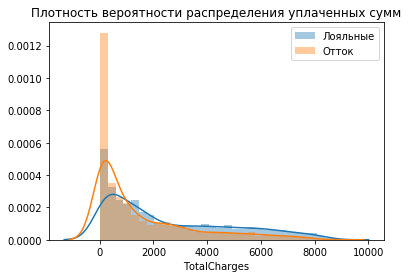

In [44]:
# отобразим графически
sns.distplot(nochurn_total, 30)
sns.distplot(churn_total, 30)
plt.title('Плотность вероятности распределения уплаченных сумм')
plt.legend(['Лояльные', 'Отток'])
plt.savefig('Плотность вероятности распределения уплаченных сумм.png', format='png', dpi=100)
plt.show()

In [42]:
# получили статистические различия в выплаченных суммах лояльными и ушедшими клиентами
# из графических представлений можем сделать вывод о том, что те клиенты, у которых высокие ежемесячные платежи, недолго пользуются услугами провайдера (ранее выяснили, что наибольший отток у клиентов, пользующихся услугами менее года) и часто уходят, итоговые уплаченные суммы остаются минимальными
# соответственно, чем  дольше клиент остается в компании, тем большая сумма платежей накапливается

ОБУЧЕНИЕ МОДЕЛЕЙ



In [54]:
# т.к. имеем задачу классификации будем использовать модели дерева решений, логистической регрессии, случайного леса
# избавимся от мультиколлинеарности, исключим из данных признак 'StreamingMovies', т.к. он максимально коррелируем с признак 'StreamingTV', axis = 1ом  'StreamingTV'
df_norm = df.drop(['StreamingMovies'], axis=1)
headers = list(df_norm.columns)
headers

['customerID',
 'tenure',
 'PhoneService',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV']

In [55]:
# формируем признаки и целевую переменную
X = df_norm[['tenure',
 'PhoneService',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV']]
y = df_norm['Churn']

In [56]:
# разделяем данные на тренировочные и тестовые
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [57]:
# приводим данные к одному масштабу
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# возвращаем к типу датафрейма
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [80]:
X_train.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV
0,-1.277367,0.325006,0.890776,0.840871,-0.841217,-1.484482,-0.997369,0.989507,-0.43979,-0.971205,-0.659400,-0.839309,-1.333427,-1.242127,-1.469006,-1.525826,-1.253110,-1.856107
1,-0.541047,0.325006,-0.845309,0.840871,1.403790,1.207925,-0.170664,0.989507,-0.43979,1.029648,1.516531,1.175715,1.083254,0.993501,1.042615,1.013208,-0.741244,0.354934
2,1.136127,0.325006,-0.845309,0.840871,-0.731610,1.023899,1.582911,0.989507,-0.43979,1.029648,1.516531,1.175715,1.083254,-0.773280,1.042615,-0.317478,1.004411,0.354934
3,-1.277367,0.325006,0.890776,-1.189243,-0.552498,-1.487798,-0.997414,0.989507,-0.43979,-0.971205,-0.659400,-0.839309,-1.333427,-1.242127,-1.469006,-1.525826,-1.253110,-1.856107
4,1.627007,0.325006,-1.311226,0.840871,-0.841217,-1.307089,-0.208418,0.989507,-0.43979,1.029648,1.516531,1.175715,-1.333427,-1.242127,-1.469006,-1.525826,-1.253110,-1.856107


In [91]:
# обучим модель дерева решений
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini')

In [92]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [94]:
# посчитаем качество модели
tree_predict = tree.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, tree_predict))
tree.score(X_test, y_test)

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1552
           1       0.48      0.52      0.50       561

    accuracy                           0.72      2113
   macro avg       0.65      0.66      0.65      2113
weighted avg       0.73      0.72      0.72      2113



0.7217226691907241

In [174]:
# обучим модель логистической регрессии
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

In [175]:
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [176]:
# посчитаем качество модели
logistic_predict = logistic.predict(X_test)
print(classification_report(y_test, logistic_predict))
logistic.score(X_test, y_test)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1552
           1       0.65      0.56      0.60       561

    accuracy                           0.80      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.79      0.80      0.80      2113



0.8012304779933743

In [58]:
# обучим модель случайный лес
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(criterion='entropy', n_estimators=50, max_depth=5, min_samples_leaf=5)

In [59]:
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [62]:
# посчитаем качество модели
forest_predict = forest.predict(X_test)
print(classification_report(y_test, forest_predict))
forest.score(X_test, y_test)

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1565
           1       0.66      0.47      0.55       548

    accuracy                           0.80      2113
   macro avg       0.75      0.69      0.71      2113
weighted avg       0.79      0.80      0.79      2113



0.8007572172266919

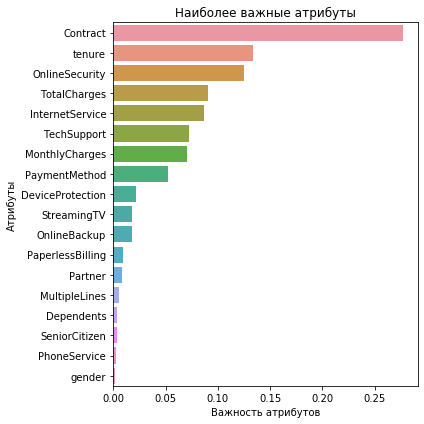

In [180]:
# определим наиболее важные атрибуты для модели
feature_imp = pd.Series(forest.feature_importances_,index=list(X.columns)).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title('Наиболее важные атрибуты')
plt.tight_layout()
plt.savefig('Наиболее важные атрибуты модели Случайный лес.png', format='png', dpi=100)
plt.show()

In [181]:
# попробуем исключить из модели 5 наименее важных атрибутов
# формируем признаки и целевую переменную
X1 = df_norm[['tenure',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Partner',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV']]
y1 = df_norm['Churn']

In [182]:
# разделяем данные на тренировочные и тестовые
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3)

In [183]:
# приводим данные к одному масштабу
sc = StandardScaler()
X1_train = sc.fit_transform(X1_train)
X1_test = sc.transform(X1_test)
# возвращаем к типу датафрейма
X1_train = pd.DataFrame(X1_train, columns=X1.columns)
X1_test = pd.DataFrame(X1_test, columns=X1.columns)

In [188]:
# обучим модель случайный лес
forest1=RandomForestClassifier(criterion='entropy', n_estimators=50, max_depth=5, min_samples_leaf=5)

In [189]:
forest1.fit(X1_train,y1_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [190]:
# посчитаем качество модели
forest1_predict = forest1.predict(X1_test)
print(classification_report(y1_test, forest1_predict))
forest1.score(X1_test, y1_test)

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1552
           1       0.68      0.44      0.54       561

    accuracy                           0.80      2113
   macro avg       0.75      0.68      0.70      2113
weighted avg       0.78      0.80      0.78      2113



0.7974443918599148

In [16]:
# качество модели не изменилось

ПРОВЕРКА ГИПОТЕЗ



In [63]:
# проверяем гипотезу о том, что увеличение периода использования услуг на 10% приведет к снижению оттока на 10%
df_hypothesis1 = df.copy()

In [64]:
df_hypothesis1.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,0.427097,1,0.452854,29.85,29.85,0,0,0,1,0,0.249267,0.189591,0.417667,0.215315,0.391276,0.416355,0.335231,0.336804
1,5575-GNVDE,34,1,0.112695,0,0.191067,56.95,1889.50,0,1,0,0,0,0.250442,0.189591,0.146112,0.399288,0.225021,0.416355,0.335231,0.336804
2,3668-QPYBK,2,1,0.427097,1,0.191067,53.85,108.15,1,1,0,0,0,0.250442,0.189591,0.146112,0.215315,0.391276,0.416355,0.335231,0.336804
3,7795-CFOCW,45,0,0.112695,0,0.167098,42.30,1840.75,0,1,0,0,0,0.249267,0.189591,0.146112,0.399288,0.225021,0.151663,0.335231,0.336804
4,9237-HQITU,2,1,0.427097,1,0.452854,70.70,151.65,1,0,0,0,0,0.250442,0.418928,0.417667,0.399288,0.391276,0.416355,0.335231,0.336804


In [65]:
average_tenure = df_hypothesis1['tenure'].mean()

In [66]:
# заменяем значения периода пользования услуг так, чтобы среднее увеличилось на 10%
df_hypothesis1['tenure'] = df_hypothesis1['tenure'].apply(lambda x, n: x+n, n = average_tenure*1.1-average_tenure)

In [67]:
df_hypothesis1['tenure'] = df_hypothesis1['tenure'].astype(int)

In [68]:
# изменение времени пользования услугой влечет изменение суммы, уплаченной клиентом, заменим значения 'TotalCharges' как произведение 'tenure' и 'MonthlyCharges'

In [69]:
df_hypothesis1['TotalCharges'] = df_hypothesis1['tenure'] * df_hypothesis1['MonthlyCharges']

In [70]:
df_hypothesis1.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,4,0,0.427097,1,0.452854,29.85,119.40,0,0,0,1,0,0.249267,0.189591,0.417667,0.215315,0.391276,0.416355,0.335231,0.336804
1,5575-GNVDE,37,1,0.112695,0,0.191067,56.95,2107.15,0,1,0,0,0,0.250442,0.189591,0.146112,0.399288,0.225021,0.416355,0.335231,0.336804
2,3668-QPYBK,5,1,0.427097,1,0.191067,53.85,269.25,1,1,0,0,0,0.250442,0.189591,0.146112,0.215315,0.391276,0.416355,0.335231,0.336804
3,7795-CFOCW,48,0,0.112695,0,0.167098,42.30,2030.40,0,1,0,0,0,0.249267,0.189591,0.146112,0.399288,0.225021,0.151663,0.335231,0.336804
4,9237-HQITU,5,1,0.427097,1,0.452854,70.70,353.50,1,0,0,0,0,0.250442,0.418928,0.417667,0.399288,0.391276,0.416355,0.335231,0.336804


In [71]:
# подготавливаем датасет для прогнозирования оттока с помощью модели "Случайный лес". Удаляем лишние столбцы
df_hypothesis1 = df_hypothesis1.drop(['customerID', 'Churn', 'StreamingMovies'], axis=1)

In [72]:
hed = df_hypothesis1.columns

In [73]:
# приводим данные к одному масштабу
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_hypothesis1 = sc.fit_transform(df_hypothesis1)
# возвращаем к типу датафрейма
df_hypothesis1 = pd.DataFrame(df_hypothesis1, columns=hed)

In [74]:
df_hypothesis1.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV
0,-1.277445,-3.054010,0.893132,0.829798,1.399743,-1.160323,-1.012939,-1.009559,-0.439916,1.034530,-0.654012,-0.909290,-0.532254,0.992892,-0.387824,1.012713,0.997207,0.686439
1,0.066327,0.327438,-0.843142,-1.205113,-0.554739,-0.259629,-0.157769,0.990532,-0.439916,-0.966622,-0.654012,-0.842906,-0.532254,-0.777493,1.037590,-0.324544,0.997207,0.686439
2,-1.236724,0.327438,0.893132,0.829798,-0.554739,-0.362660,-0.948471,0.990532,-0.439916,-0.966622,-0.654012,-0.842906,-0.532254,-0.777493,-0.387824,1.012713,0.997207,0.686439
3,0.514251,-3.054010,-0.843142,-1.205113,-0.733687,-0.746535,-0.190788,0.990532,-0.439916,-0.966622,-0.654012,-0.909290,-0.532254,-0.777493,1.037590,-0.324544,-0.750995,0.686439
4,-1.236724,0.327438,0.893132,0.829798,1.399743,0.197365,-0.912225,-1.009559,-0.439916,-0.966622,-0.654012,-0.842906,1.078557,0.992892,1.037590,1.012713,0.997207,0.686439


In [75]:
# прогнозируем отток
churn_hypothesis1 = forest.predict(df_hypothesis1)
result_hypothesis1 = pd.DataFrame(sc.inverse_transform(df_hypothesis1), columns=hed)
result_hypothesis1['Churn'] = churn_hypothesis1
result_hypothesis1.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,Churn
0,4.0,0.0,0.427097,1.0,0.452854,29.85,119.40,0.0,0.0,1.0,0.0,0.249267,0.189591,0.417667,0.215315,0.391276,0.416355,0.335231,1
1,37.0,1.0,0.112695,0.0,0.191067,56.95,2107.15,1.0,0.0,0.0,0.0,0.250442,0.189591,0.146112,0.399288,0.225021,0.416355,0.335231,0
2,5.0,1.0,0.427097,1.0,0.191067,53.85,269.25,1.0,0.0,0.0,0.0,0.250442,0.189591,0.146112,0.215315,0.391276,0.416355,0.335231,0
3,48.0,0.0,0.112695,0.0,0.167098,42.30,2030.40,1.0,0.0,0.0,0.0,0.249267,0.189591,0.146112,0.399288,0.225021,0.151663,0.335231,0
4,5.0,1.0,0.427097,1.0,0.452854,70.70,353.50,0.0,0.0,0.0,0.0,0.250442,0.418928,0.417667,0.399288,0.391276,0.416355,0.335231,1


In [76]:
# рассчитаем процент ушедших клиентов
print('Сколько клиентов ушло:', len(result_hypothesis1[result_hypothesis1['Churn'] == 1]))
print('Сколько клиентов осталось:', len(result_hypothesis1[result_hypothesis1['Churn'] == 0]))
print('Процент ушедших:', round(((len(result_hypothesis1[result_hypothesis1['Churn'] == 1])*100)/len(result_hypothesis1)), 2))

Сколько клиентов ушло: 1282
Сколько клиентов осталось: 5761
Процент ушедших: 18.2


C:\Users\Win10Pro\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  


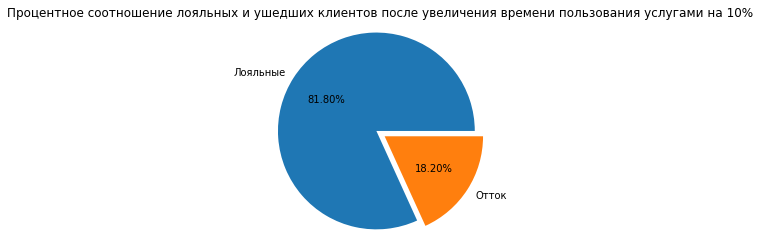

In [136]:
vals = [5761, 1282]
labels = ['Лояльные', 'Отток']
explode = (0.1, 0)
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.2f%%', explode=explode)
ax.axis("equal")
plt.title('Процентное соотношение лояльных и ушедших клиентов после увеличения времени пользования услугами на 10%')
plt.tight_layout()
plt.savefig('Процентное соотношение лояльных и ушедших клиентов_гипотеза1.png', format='png', dpi=100)
plt.show()

In [108]:
# увеличение среднего времени пользования услугой привело к снижению оттока на 8,34%, что считаем неплохим результатом, и гипотеза может быть жизнеспособной

In [81]:
# проверим гипотезу о том, что если 5% клиентов заключат договор на оказание услуг не помесячно, а на год, то отток сократится на 10%

In [82]:
df_hypothesis2 = df.copy()

In [91]:
df_hypothesis2.Contract.value_counts()

0.427097    3875
0.028319    1695
0.112695    1473
Name: Contract, dtype: int64

In [92]:
# словарь каунтов: {'Contract': {'Month-to-month': 0.4270967741935484, 'One year': 0.11269517990495587, 'Two year': 0.02831858407079646}
# сортируем по убыванию значений, первые 194 (5% от всех 'Month-to-month') заменяем на 'One year' (0.11269517990495587)
df_hypothesis2 = df_hypothesis2.sort_values('Contract', ascending=False)
df_hypothesis2.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
4603,3594-KADLU,3,0,0.427097,0,0.191067,35.10,101.10,0,1,0,1,0,0.249267,0.189591,0.146112,0.399288,0.391276,0.151663,0.335231,0.336804
4899,1565-RHDJD,4,1,0.427097,0,0.167098,84.05,333.55,1,0,0,0,1,0.286099,0.418928,0.417667,0.215315,0.225021,0.416355,0.335231,0.336804
4837,5134-IKDAY,1,1,0.427097,1,0.452854,69.80,69.80,1,0,0,1,1,0.250442,0.418928,0.417667,0.399288,0.391276,0.416355,0.335231,0.336804
4836,0584-BJQGZ,25,1,0.427097,1,0.167098,78.35,1837.90,0,0,0,0,0,0.286099,0.189591,0.146112,0.215315,0.225021,0.151663,0.300702,0.336804
4835,2360-RDGRO,65,1,0.427097,1,0.452854,104.25,6812.95,0,1,0,1,0,0.286099,0.418928,0.146112,0.399288,0.225021,0.416355,0.300702,0.299414


In [95]:
df_hypothesis2.Contract.iloc[0:193] = 0.11269517990495587

C:\Users\Win10Pro\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [97]:
df_hypothesis2.Contract.value_counts()

0.427097    3682
0.028319    1695
0.112695    1666
Name: Contract, dtype: int64

In [98]:
# подготавливаем датасет для прогнозирования оттока с помощью модели "Случайный лес". Удаляем лишние столбцы
df_hypothesis2 = df_hypothesis2.drop(['customerID', 'Churn', 'StreamingMovies'], axis=1)

In [100]:
hed = df_hypothesis2.columns

In [101]:
# приводим данные к одному масштабу
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_hypothesis2 = sc.fit_transform(df_hypothesis2)
# возвращаем к типу датафрейма
df_hypothesis2 = pd.DataFrame(df_hypothesis2, columns=hed)

In [102]:
# прогнозируем отток
churn_hypothesis2 = forest.predict(df_hypothesis2)
result_hypothesis2 = pd.DataFrame(sc.inverse_transform(df_hypothesis2), columns=hed)
result_hypothesis2['Churn'] = churn_hypothesis2
result_hypothesis2.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,Churn
0,3.0,0.0,0.112695,0.0,0.191067,35.10,101.10,1.0,0.0,1.0,0.0,0.249267,0.189591,0.146112,0.399288,0.391276,0.151663,0.335231,0
1,4.0,1.0,0.112695,0.0,0.167098,84.05,333.55,0.0,0.0,0.0,1.0,0.286099,0.418928,0.417667,0.215315,0.225021,0.416355,0.335231,0
2,1.0,1.0,0.112695,1.0,0.452854,69.80,69.80,0.0,0.0,1.0,1.0,0.250442,0.418928,0.417667,0.399288,0.391276,0.416355,0.335231,0
3,25.0,1.0,0.112695,1.0,0.167098,78.35,1837.90,0.0,0.0,0.0,0.0,0.286099,0.189591,0.146112,0.215315,0.225021,0.151663,0.300702,0
4,65.0,1.0,0.112695,1.0,0.452854,104.25,6812.95,1.0,0.0,1.0,0.0,0.286099,0.418928,0.146112,0.399288,0.225021,0.416355,0.300702,0


In [104]:
# рассчитаем процент ушедших клиентов
print('Сколько клиентов ушло:', len(result_hypothesis2[result_hypothesis2['Churn'] == 1]))
print('Сколько клиентов осталось:', len(result_hypothesis2[result_hypothesis2['Churn'] == 0]))
print('Процент ушедших:', round(((len(result_hypothesis2[result_hypothesis2['Churn'] == 1])*100)/len(result_hypothesis2)), 2))

Сколько клиентов ушло: 1225
Сколько клиентов осталось: 5818
Процент ушедших: 17.39


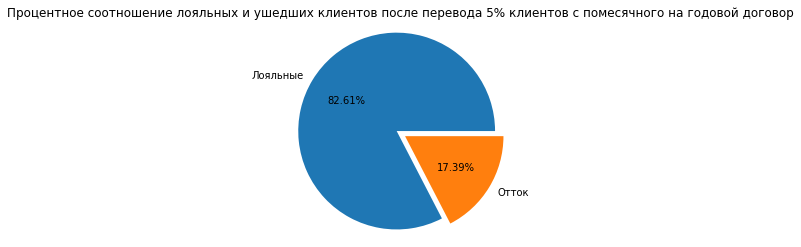

In [106]:
vals = [5818, 1225]
labels = ['Лояльные', 'Отток']
explode = (0.1, 0)
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.2f%%', explode=explode)
ax.axis("equal")
plt.title('Процентное соотношение лояльных и ушедших клиентов после перевода 5% клиентов с помесячного на годовой договор')
plt.savefig('Процентное соотношение лояльных и ушедших клиентов_гипотеза2.png', format='png', dpi=100)
plt.show()

In [109]:
# перевод 5% клиентов с помесячного договора на оказание услуг на годовой договор привело к снижению оттока на 9,15%, данную гипотезу также можем считать жизнеспособной

In [110]:
# проверим гипотезу о том, что подключение пяти процентам клиентов сервиса по онлайн-безопасности приведет к снижению оттока на 10%

In [111]:
df_hypothesis3 = df.copy()

In [113]:
df_hypothesis3.OnlineSecurity.value_counts()

0.417667    3498
0.146112    2019
0.074050    1526
Name: OnlineSecurity, dtype: int64

In [114]:
# словарь каунтов: {'OnlineSecurity': {'No': 0.4176672384219554, 'Yes': 0.14611193660227836, 'No internet service': 0.07404980340760157}}
# сортируем по убыванию значений, первые 175 (5% от все, у кого нет сервиса) заменяем на 'Yes' (0.14611193660227836)
df_hypothesis3 = df_hypothesis3.sort_values('OnlineSecurity', ascending=False)
df_hypothesis3.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,0.427097,1,0.452854,29.85,29.85,0,0,0,1,0,0.249267,0.189591,0.417667,0.215315,0.391276,0.416355,0.335231,0.336804
3111,8809-RIHDD,72,1,0.028319,1,0.452854,103.40,7372.65,1,1,0,1,1,0.286099,0.418928,0.417667,0.215315,0.225021,0.416355,0.300702,0.299414
2700,2346-DJQTB,35,0,0.427097,0,0.452854,24.15,812.50,0,0,0,0,0,0.249267,0.189591,0.417667,0.399288,0.391276,0.416355,0.335231,0.336804
5315,2082-CEFLT,1,1,0.427097,1,0.452854,45.60,45.60,1,1,0,0,0,0.250442,0.189591,0.417667,0.399288,0.391276,0.416355,0.335231,0.336804
2702,1942-OQFRW,1,1,0.427097,0,0.452854,44.00,44.00,0,1,0,0,0,0.250442,0.189591,0.417667,0.399288,0.391276,0.416355,0.335231,0.336804


In [115]:
df_hypothesis3.OnlineSecurity.iloc[0:174] = 0.14611193660227836

C:\Users\Win10Pro\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [116]:
df_hypothesis3.OnlineSecurity.value_counts()

0.417667    3324
0.146112    2193
0.074050    1526
Name: OnlineSecurity, dtype: int64

In [117]:
# подготавливаем датасет для прогнозирования оттока с помощью модели "Случайный лес". Удаляем лишние столбцы
df_hypothesis3 = df_hypothesis3.drop(['customerID', 'Churn', 'StreamingMovies'], axis=1)

In [119]:
hed = df_hypothesis3.columns

In [120]:
# приводим данные к одному масштабу
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_hypothesis3 = sc.fit_transform(df_hypothesis3)
# возвращаем к типу датафрейма
df_hypothesis3 = pd.DataFrame(df_hypothesis3, columns=hed)

In [121]:
# прогнозируем отток
churn_hypothesis3 = forest.predict(df_hypothesis3)
result_hypothesis3 = pd.DataFrame(sc.inverse_transform(df_hypothesis3), columns=hed)
result_hypothesis3['Churn'] = churn_hypothesis3
result_hypothesis3.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,Churn
0,1.0,0.0,0.427097,1.0,0.452854,29.85,29.85,0.0,0.0,1.0,0.0,0.249267,0.189591,0.146112,0.215315,0.391276,0.416355,0.335231,0
1,72.0,1.0,0.028319,1.0,0.452854,103.40,7372.65,1.0,0.0,1.0,1.0,0.286099,0.418928,0.146112,0.215315,0.225021,0.416355,0.300702,0
2,35.0,0.0,0.427097,0.0,0.452854,24.15,812.50,0.0,0.0,0.0,0.0,0.249267,0.189591,0.146112,0.399288,0.391276,0.416355,0.335231,0
3,1.0,1.0,0.427097,1.0,0.452854,45.60,45.60,1.0,0.0,0.0,0.0,0.250442,0.189591,0.146112,0.399288,0.391276,0.416355,0.335231,1
4,1.0,1.0,0.427097,0.0,0.452854,44.00,44.00,1.0,0.0,0.0,0.0,0.250442,0.189591,0.146112,0.399288,0.391276,0.416355,0.335231,0


In [122]:
# рассчитаем процент ушедших клиентов
print('Сколько клиентов ушло:', len(result_hypothesis3[result_hypothesis3['Churn'] == 1]))
print('Сколько клиентов осталось:', len(result_hypothesis3[result_hypothesis3['Churn'] == 0]))
print('Процент ушедших:', round(((len(result_hypothesis3[result_hypothesis3['Churn'] == 1])*100)/len(result_hypothesis3)), 2))

Сколько клиентов ушло: 1268
Сколько клиентов осталось: 5775
Процент ушедших: 18.0


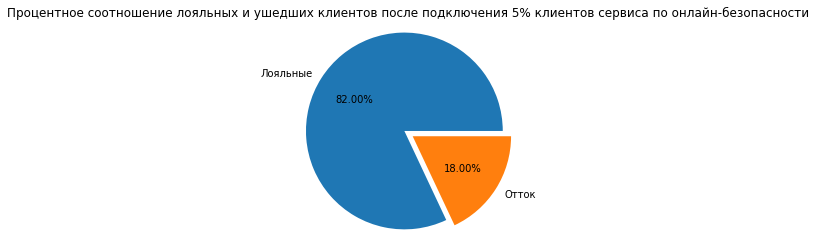

In [123]:
vals = [5775, 1268]
labels = ['Лояльные', 'Отток']
explode = (0.1, 0)
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.2f%%', explode=explode)
ax.axis("equal")
plt.title('Процентное соотношение лояльных и ушедших клиентов после подключения 5% клиентов сервиса по онлайн-безопасности')
plt.savefig('Процентное соотношение лояльных и ушедших клиентов_гипотеза3.png', format='png', dpi=100)
plt.show()

In [124]:
# после подключения пяти процентам клиентов сервиса по онлайн-безопасности отток уменишился на 8,54%

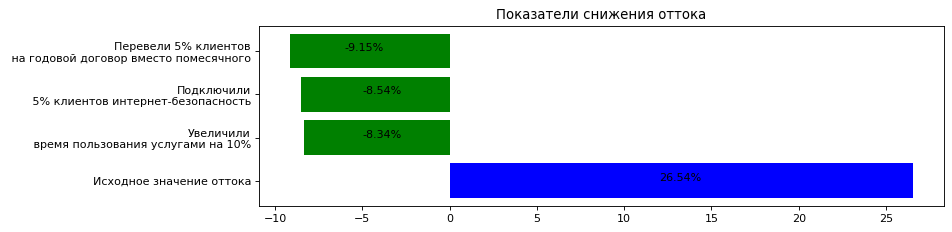

In [153]:
val = [26.54, -8.34, -8.54, -9.15]
name = ['Исходное значение оттока', 'Увеличили\n время пользования услугами на 10%', 'Подключили\n 5% клиентов интернет-безопасность', 'Перевели 5% клиентов\n на годовой договор вместо помесячного']
colors = ['green' if x < 0 else 'blue' for x in val]
plt.figure(figsize=(12,3), dpi= 80)
plt.barh(name, val, color=colors)
plt.title('Показатели снижения оттока')
plt.text(12, 'Исходное значение оттока', '26.54%')
plt.text(-5, 'Увеличили\n время пользования услугами на 10%', '-8.34%')
plt.text(-5, 'Подключили\n 5% клиентов интернет-безопасность', '-8.54%')
plt.text(-6, 'Перевели 5% клиентов\n на годовой договор вместо помесячного', '-9.15%')
plt.tight_layout()
plt.savefig('Показатели снижения оттока.png', format='png', dpi=100)
plt.show()